In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from google.colab import files

In [3]:
file_path = "/content/netflix_titles.csv"
df = pd.read_csv(file_path)

In [4]:
print("✅ Dataset successfully loaded!")
print(f"Total records: {df.shape[0]} | Total columns: {df.shape[1]}")
display(df.head())

✅ Dataset successfully loaded!
Total records: 8807 | Total columns: 12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.drop_duplicates(inplace=True)


/tmp/ipython-input-745673212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


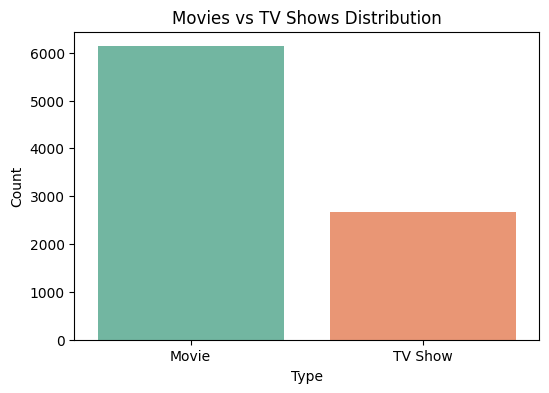

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3956359511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


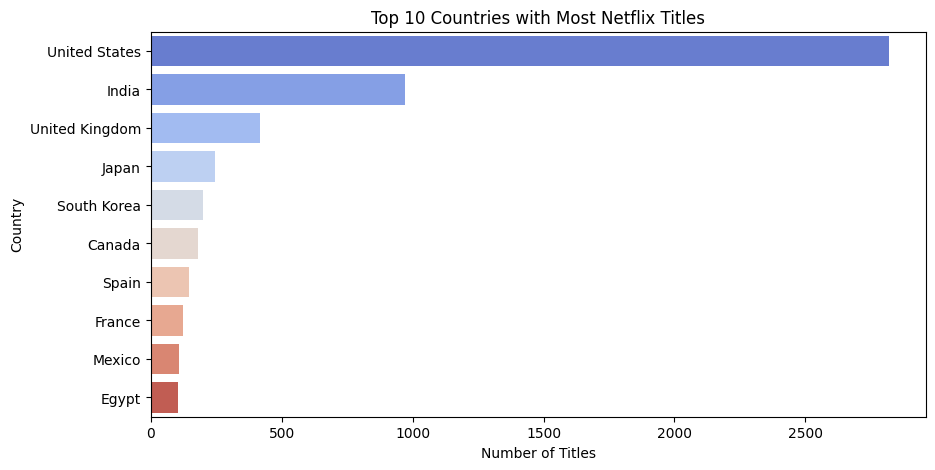

In [7]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

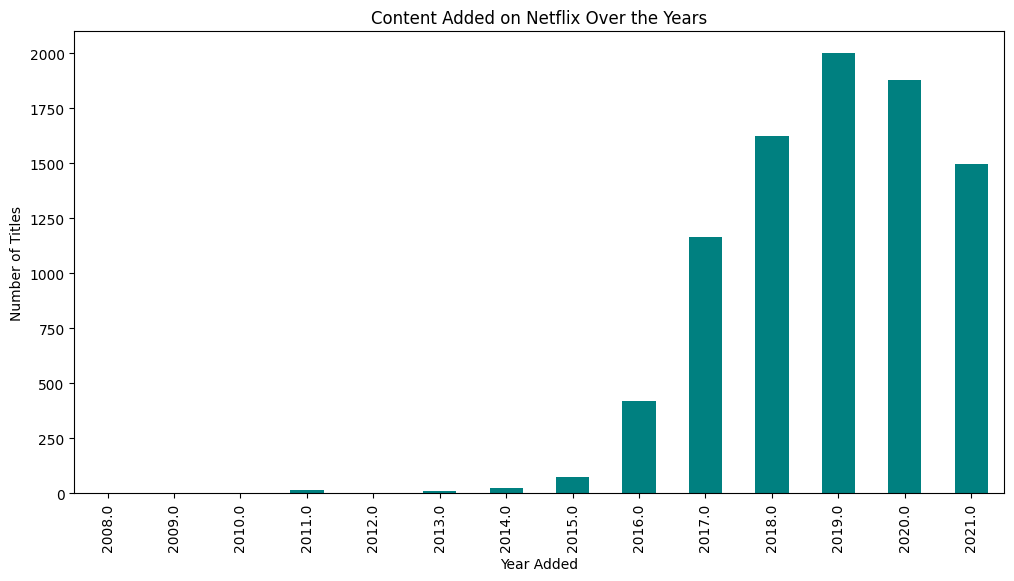

In [8]:
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Content Added on Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-2188169813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


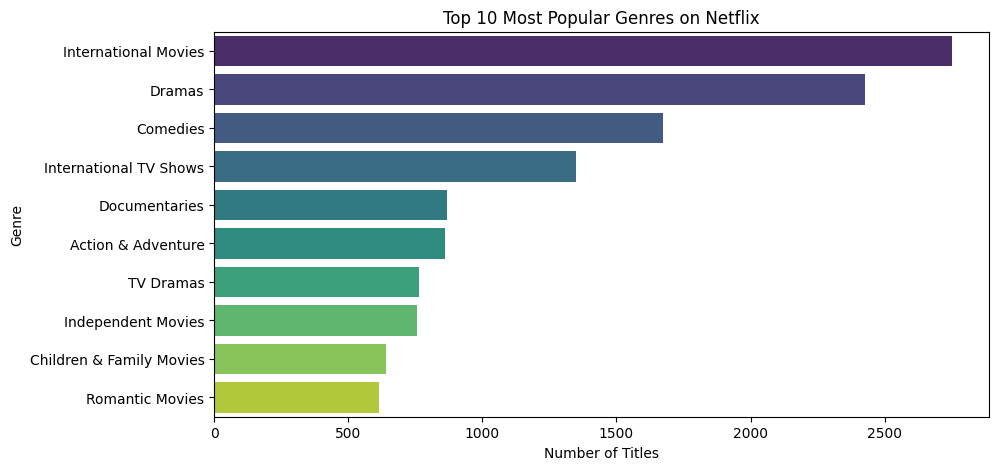

In [9]:
genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre.strip() for sublist in genres for genre in sublist]
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 10 Most Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-142777724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='pastel')


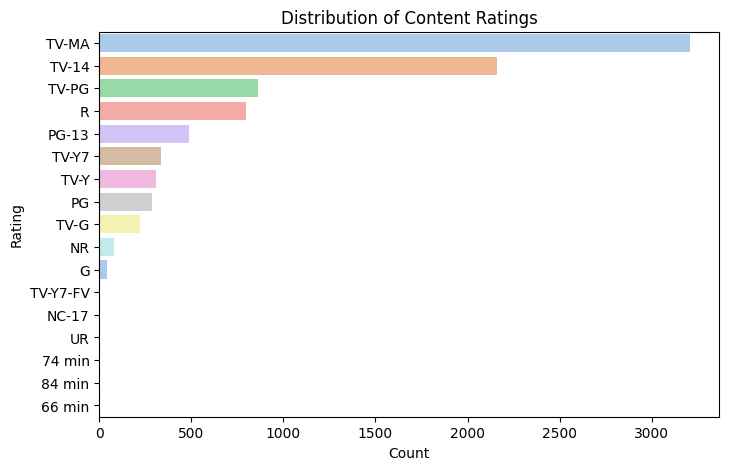

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='pastel')
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


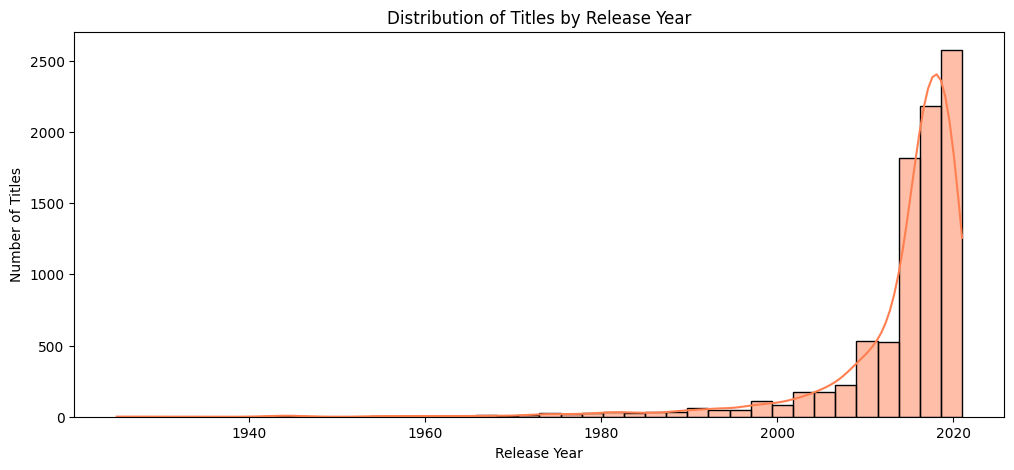

In [11]:
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'], bins=40, kde=True, color='coral')
plt.title("Distribution of Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


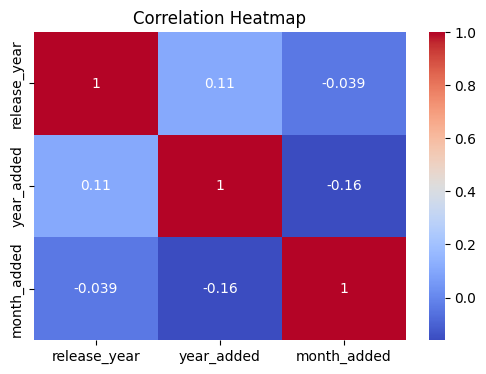

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['release_year', 'year_added', 'month_added']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [13]:
print("""
🎯 FINAL INSIGHTS:
---------------------
1️⃣ Netflix has more Movies (~70%) than TV Shows (~30%).
2️⃣ USA, India, and UK are top content-producing countries.
3️⃣ Major content expansion occurred between 2015–2020.
4️⃣ Top genres include Dramas, Comedies, and Documentaries.
5️⃣ Most titles are rated 'TV-MA' — targeting mature audiences.
6️⃣ Netflix’s global content diversity has increased over the years.
7️⃣ Correlation shows a strong link between release and addition years.
""")


🎯 FINAL INSIGHTS:
---------------------
1️⃣ Netflix has more Movies (~70%) than TV Shows (~30%).
2️⃣ USA, India, and UK are top content-producing countries.
3️⃣ Major content expansion occurred between 2015–2020.
4️⃣ Top genres include Dramas, Comedies, and Documentaries.
5️⃣ Most titles are rated 'TV-MA' — targeting mature audiences.
6️⃣ Netflix’s global content diversity has increased over the years.
7️⃣ Correlation shows a strong link between release and addition years.



/tmp/ipython-input-1954905737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


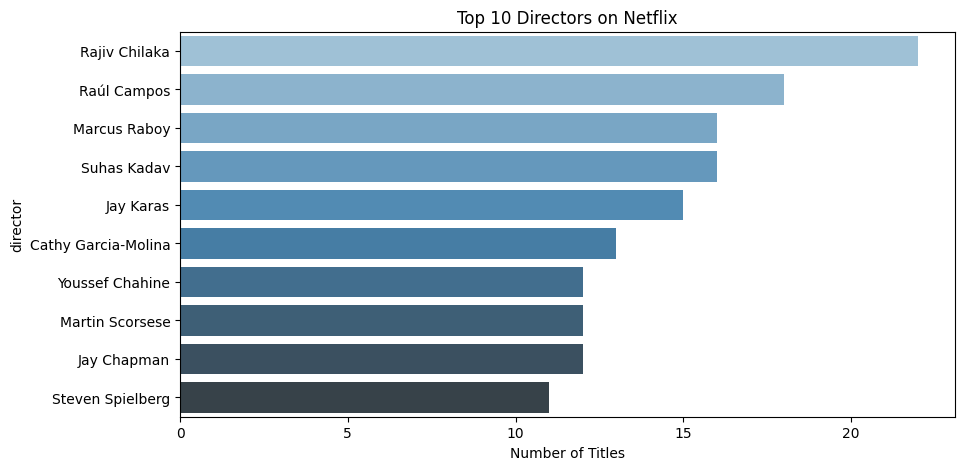

/tmp/ipython-input-1954905737.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='rocket_r')


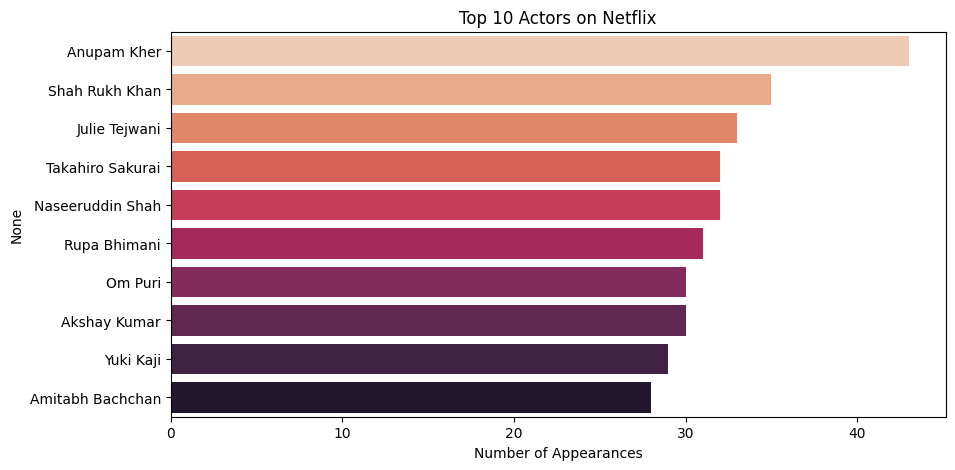

In [14]:
top_directors = df['director'].dropna().apply(lambda x: x.split(', ')[0]).value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.show()

# Top actors
actors = df['cast'].dropna().apply(lambda x: x.split(', '))
all_actors = [a.strip() for sublist in actors for a in sublist]
top_actors = pd.Series(Counter(all_actors)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='rocket_r')
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.show()

/tmp/ipython-input-4063105892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


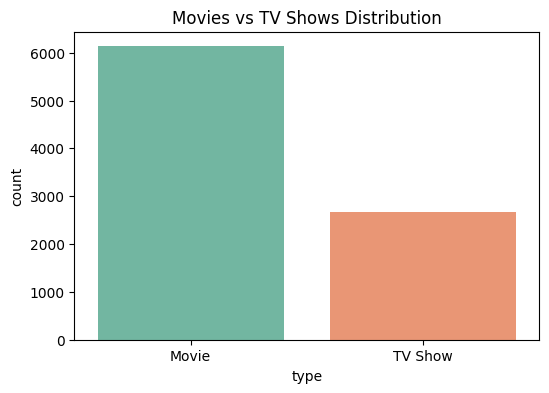

/tmp/ipython-input-4063105892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


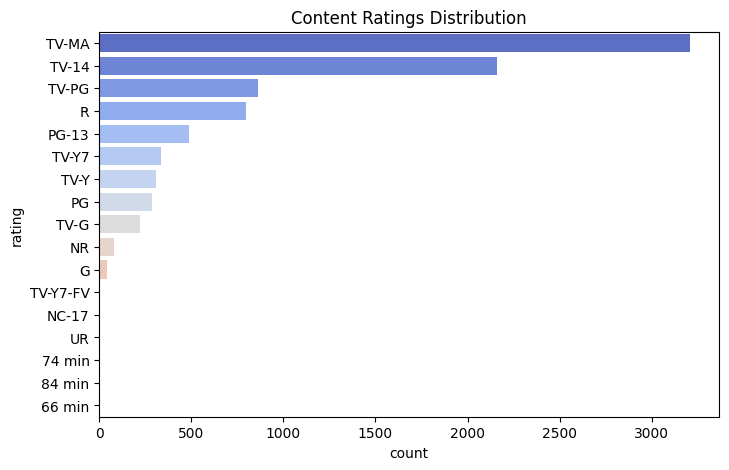

In [15]:
# Type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows Distribution")
plt.show()

# Ratings
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Content Ratings Distribution")
plt.show()

/tmp/ipython-input-2637947135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


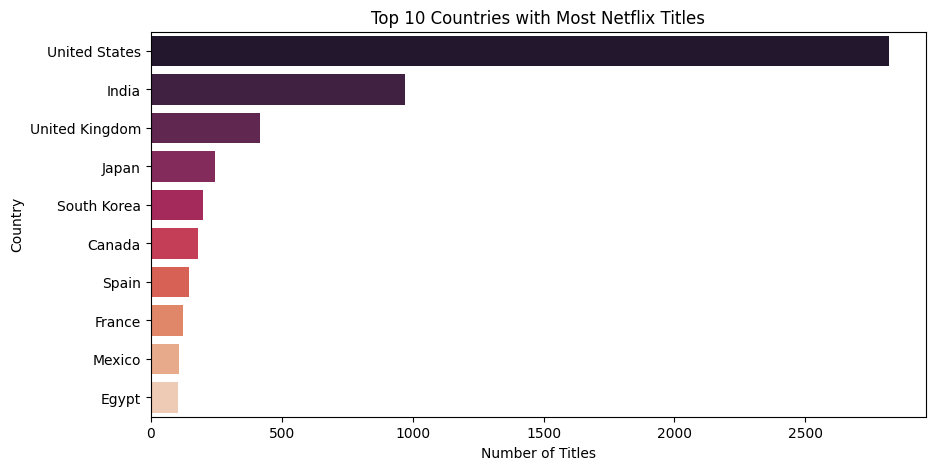

In [16]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()